## Henry Fernandez - Titanic Assignment

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
%pwd

'C:\\Users\\hdfer\\OneDrive\\Desktop\\Henry\\Uchicago\\Quarter 2\\Data Mining Principles\\Week-6\\Assignment_3\\Titanic Survival'

In [3]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv("holdout_test.csv")
test_data.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,NaN,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,NaN,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,NaN,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,NaN,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in Age, Cabin, and Embarked Columns

In [6]:
train_data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Mostly Single People

In [7]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Mostly Southhampton, so fillna with S

In [8]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

C:\Users\hdfer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

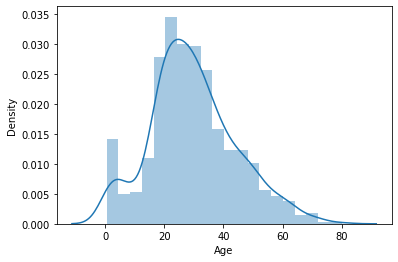

In [9]:
sns.distplot(train_data.Age)

In [10]:
train_data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
train_data['Age'] = train_data['Age'].interpolate()

In [12]:
train_data.Age.describe()

count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\hdfer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

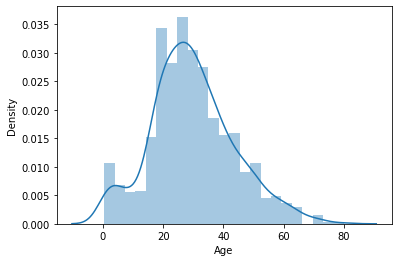

In [13]:
sns.distplot(train_data.Age)

In [14]:
train_data = train_data.drop('Cabin', axis =1)

In [15]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket'], axis =1)

No significant predictive (or easy) value in these dropped columns

In [17]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:xlabel='Pclass', ylabel='count'>

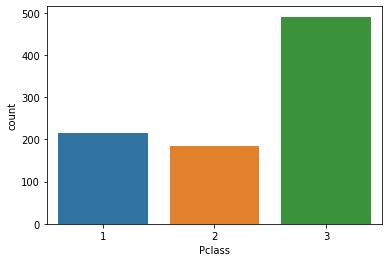

In [18]:
sns.countplot(x = 'Pclass', data = train_data)

Majority very much in 3rd class (Economy) -- Investigate this

C:\Users\hdfer\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


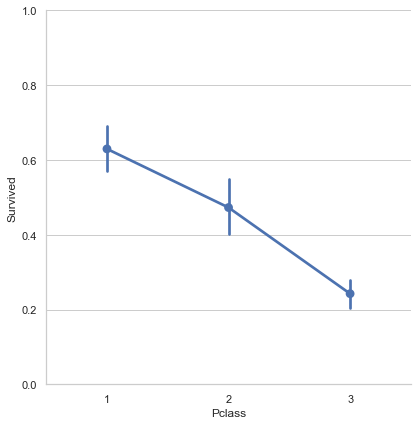

In [19]:
sns.set(style = 'whitegrid')
ax = sns.PairGrid(data = train_data, x_vars = ['Pclass'], y_vars='Survived', size = 6)
ax.map(sns.pointplot)
ax.set(ylim = (0,1))

Probability of surviving goes down as your clas incresaes -- this is a good learner for the model

C:\Users\hdfer\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


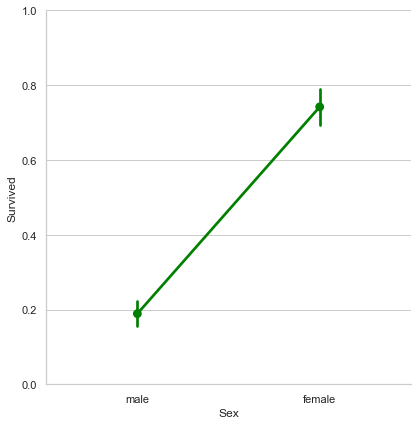

In [20]:
g = sns.PairGrid(data = train_data, x_vars=['Sex'], y_vars = 'Survived', size = 6)
g.map(sns.pointplot, color = 'green')
g.set(ylim = (0,1))

Another good learner. Women were more likely or prioritized in survival as opposed to Men.

Ok! Now, instead of age, let's classify if the passenger was a child or not. Create dummy variable.

In [21]:
train_data['is_child'] = train_data['Age'].apply(lambda x: 1 if x <= 15 else 0)

C:\Users\hdfer\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


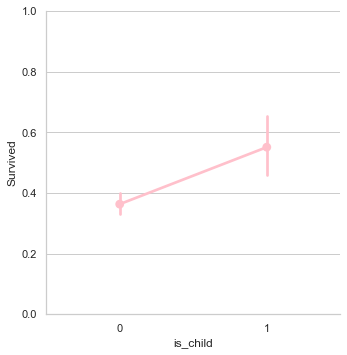

In [22]:
c = sns.PairGrid(data = train_data, x_vars = 'is_child', y_vars = 'Survived', size = 5)
c.map(sns.pointplot, color = "pink")
c.set(ylim = (0,1))

Survival rate of child is higher than adults. Good for ML purposes.

### Create Dummy Variables 

In [23]:
train_data['family'] = train_data['SibSp'] + train_data['Parch']
train_data = train_data.drop(['SibSp', 'Parch'], axis = 1)

In [24]:
train_data['is_alone'] = train_data['family'].apply(lambda x: 1 if x == 0 else 0)

In [25]:
train_data['is_female'] = train_data['Sex'].apply(lambda x : 1 if x == 'female' else 0)
train_data = train_data.drop('Sex', axis =1)
train_data.head()

,Survived,Pclass,Age,Fare,Embarked,is_child,family,is_alone,is_female
0,0,3,22.0,7.2500,S,0,1,0,0
1,1,1,38.0,71.2833,C,0,1,0,1
2,1,3,26.0,7.9250,S,0,0,1,1
3,1,1,35.0,53.1000,S,0,1,0,1
4,0,3,35.0,8.0500,S,0,0,1,0


In [26]:
train_data = pd.get_dummies(train_data, prefix = ['is'])
train_data.head()

,Survived,Pclass,Age,Fare,is_child,family,is_alone,is_female,is_C,is_Q,is_S
0,0,3,22.0,7.2500,0,1,0,0,0,0,1
1,1,1,38.0,71.2833,0,1,0,1,1,0,0
2,1,3,26.0,7.9250,0,0,1,1,0,0,1
3,1,1,35.0,53.1000,0,1,0,1,0,0,1
4,0,3,35.0,8.0500,0,0,1,0,0,0,1


### Now we can start training our model

In [54]:
#Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [55]:
X, y = train_data.drop(['Survived'], axis=1), train_data['Survived']

In [56]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, stratify=y)

In [57]:
def classifier_model(model):
    classifier = model()
    classifier.fit(train_X,train_y)
    y_pred = classifier.predict(test_X)
    acc = round(classifier.score(test_X,test_y) * 100, 2)
    print(classification_report(test_y, y_pred))
    print("RMSE: ", np.sqrt(mean_squared_error(test_y, y_pred)))
    print("MAE: ", mean_absolute_error(test_y,y_pred))
    print(str(acc) + ' percent')
    return classifier         

In [58]:
classifier_model(DecisionTreeClassifier)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       110
           1       0.70      0.74      0.72        69

    accuracy                           0.78       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

RMSE:  0.47271945924706543
MAE:  0.22346368715083798
77.65 percent


DecisionTreeClassifier()

In [59]:
classifier_model(LogisticRegression)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.76      0.77      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

RMSE:  0.42936877145344576
MAE:  0.18435754189944134
81.56 percent


C:\Users\hdfer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
classifier_model(RandomForestClassifier)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       110
           1       0.85      0.72      0.78        69

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

RMSE:  0.3955054753168236
MAE:  0.1564245810055866
84.36 percent


RandomForestClassifier()

In [62]:
classifier_model(XGBClassifier)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

RMSE:  0.42936877145344576
MAE:  0.18435754189944134
81.56 percent


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Going to try to put together a different set of predictors and test model's performance on those

<AxesSubplot:>

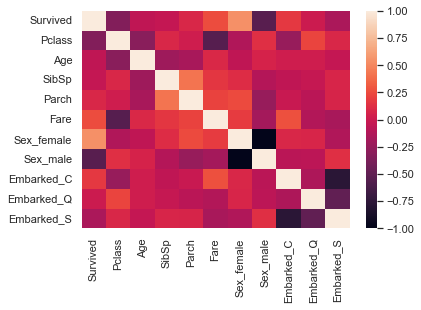

In [34]:
train2 = pd.read_csv("train.csv")
train2 = train2.drop('Cabin', axis =1)
train2['Age'] = train2['Age'].interpolate()
train2 = train2.drop(['PassengerId','Name','Ticket'],axis=1)
train2 = pd.get_dummies(train2, columns = ['Sex','Embarked'])
correlation_matrix = train2.corr()
sns.heatmap(correlation_matrix)

In [35]:
X2, y2 = train2.drop(['Survived'], axis=1), train2['Survived']

In [36]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X2= scaler.fit_transform(X2)

In [37]:
train_X2, test_X2, train_y2, test_y2 = train_test_split(X2, y2, train_size = 0.8, test_size = 0.2)

In [38]:
def classifier_model2(model):
    classifier = model()
    classifier.fit(train_X2,train_y2)
    y_pred = classifier.predict(test_X2)
    acc = round(classifier.score(test_X2,test_y2) * 100, 2)
    print(classification_report(test_y2, y_pred))
    print("RMSE: ", np.sqrt(mean_squared_error(test_y2, y_pred)))
    print("MAE: ", mean_absolute_error(test_y2,y_pred))
    print(str(acc) + ' percent')
    return classifier         

In [39]:
classifier_model2(LogisticRegression)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       109
           1       0.79      0.76      0.77        70

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

RMSE:  0.41615424729527806
MAE:  0.17318435754189945
82.68 percent


LogisticRegression()

In [40]:
classifier_model2(RandomForestClassifier)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       109
           1       0.77      0.69      0.73        70

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179

RMSE:  0.4484610556511615
MAE:  0.2011173184357542
79.89 percent


RandomForestClassifier()

In [41]:
classifier_model2(DecisionTreeClassifier)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       109
           1       0.70      0.71      0.71        70

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

RMSE:  0.478591975830779
MAE:  0.22905027932960895
77.09 percent


DecisionTreeClassifier()

### Exploring Parameter Tuning with GridSearchCV

In [43]:
tuned_forest=RandomForestClassifier(max_features='sqrt', n_estimators= 50, max_depth=8, criterion='gini',min_samples_split = 2)

In [44]:
tuned_forest.fit(train_X,train_y)
y_pred = tuned_forest.predict(test_X)
acc = round(tuned_forest.score(test_X,test_y) * 100, 2)
print(classification_report(test_y, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(test_y, y_pred)))
print("MAE: ", mean_absolute_error(test_y,y_pred))
print(str(acc) + ' percent')   

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       110
           1       0.82      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

RMSE:  0.4025061157105039
MAE:  0.16201117318435754
83.8 percent


81% Doesn't seem great but that's the best performing one for the baseline model.

### Now Test Data on Holdout Testing Data Set

In [45]:
dftest = pd.read_csv('holdout_test.csv')
dftest = dftest.drop('Cabin',axis=1)
dftest=dftest.drop(['PassengerId','Name','Ticket'],axis=1)
dftest['is_child'] = dftest['Age'].apply(lambda x: 1 if x <= 15 else 0)
dftest['family'] = dftest['SibSp'] + dftest['Parch']
dftest = dftest.drop(['SibSp','Parch'],axis =1)
dftest['is_alone'] = dftest['family'].apply(lambda x: 1 if x == 'female' else 0)
dftest['is_female'] = dftest['Sex'].apply(lambda x: 1 if x == 'female' else 0)
dftest = dftest.drop('Sex', axis =1)
dftest = pd.get_dummies(dftest, prefix=['is'])

In [46]:
dftest.head()

,Survived,Pclass,Age,Fare,is_child,family,is_alone,is_female,is_C,is_Q,is_S
0,NaN,3,34.5,7.8292,0,0,0,0,0,1,0
1,NaN,3,47.0,7.0000,0,1,0,1,0,0,1
2,NaN,2,62.0,9.6875,0,0,0,0,0,1,0
3,NaN,3,27.0,8.6625,0,0,0,0,0,0,1
4,NaN,3,22.0,12.2875,0,2,0,1,0,0,1


In [47]:
X_testset = dftest
X_testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   0 non-null      float64
 1   Pclass     418 non-null    int64  
 2   Age        332 non-null    float64
 3   Fare       417 non-null    float64
 4   is_child   418 non-null    int64  
 5   family     418 non-null    int64  
 6   is_alone   418 non-null    int64  
 7   is_female  418 non-null    int64  
 8   is_C       418 non-null    uint8  
 9   is_Q       418 non-null    uint8  
 10  is_S       418 non-null    uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 27.5 KB


In [48]:
dftest['Age'] = dftest['Age'].interpolate()

In [49]:
X_testset = dftest
X_testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   0 non-null      float64
 1   Pclass     418 non-null    int64  
 2   Age        418 non-null    float64
 3   Fare       417 non-null    float64
 4   is_child   418 non-null    int64  
 5   family     418 non-null    int64  
 6   is_alone   418 non-null    int64  
 7   is_female  418 non-null    int64  
 8   is_C       418 non-null    uint8  
 9   is_Q       418 non-null    uint8  
 10  is_S       418 non-null    uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 27.5 KB


In [50]:
dftest['Fare'] = dftest['Fare'].fillna(dftest['Fare'].mean())
X_testset = dftest
X_testset = X_testset.drop('Survived', axis = 1)

In [51]:
tuned_forest.fit(train_X,train_y)
y_pred_random_forest = tuned_forest.predict(X_testset)

## Summary of Process

After the EDA and data pre-processing stage, I tried a few different modeling techniques. 1 was were tried the baseline models
with the predictors used int the Titanic Video, and 1 were I used slightly different predictors and also applied StandardScaler
to the training data seeing the model would perform better. It did not seem to make any sort of difference. Random Forest also seemed to be the best-performing model albeit not by a huge margin. I also used GridSearchCV to try and select the right hyperparameters for the Random Forest Classifier but it did not improve the model either. I was prepared to apply K-folds and check the CV scores for overfitting after applying Gridsearch, but the model wasn't peforming well enough to justify it. I think an accuracy score over 85 - 90% is definitely acheivable here. 

In [66]:
%pwd

'C:\\Users\\hdfer\\OneDrive\\Desktop\\Henry\\Uchicago\\Quarter 2\\Data Mining Principles\\Week-6\\Assignment_3\\Titanic Survival'

In [169]:
test = pd.read_csv('holdout_test.csv')
predict = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_random_forest
    })

In [170]:
predict.to_csv('Titanic Results From Henry Fernandez.csv', index=False)